# Libraries

In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import scipy.stats as stats

# Data

In [226]:
data = pd.read_csv(r"C:\Users\user\Documents\Datasets\Australian Car\cars_info.csv")
data.head()

ID                                               Name   Price  \
0  11530130                  2010 Toyota Rukus Build 2 AZE151R    9999   
1  12190570  2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...  117990   
2  12321855  2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...   79990   
3  12346971         2010 Mercedes-Benz E250 CDI Avantgarde 207   34990   
4  12363884                       2016 Holden Cruze CD JH MY16   15990   

           Brand    Model               Variant    Series  Year  Kilometers  \
0         Toyota    Rukus               Build 2   AZE151R  2010      263000   
1  Mercedes-Benz        V  250 D Avantgarde MWB  447 MY21  2021          19   
2  Mercedes-Benz  Valente       116 CDI MWB RWD  447 MY21  2021          24   
3  Mercedes-Benz     E250        CDI Avantgarde       207  2010      120579   
4         Holden    Cruze                    CD   JH MY16  2016       72506   

          Type    Gearbox             Fuel         Status    CC  Color  \
0        Wagon  Automatic  Unleaded Petrol           Used  2362   Grey   
1        Wagon  Automatic           Diesel   New In Stock  2143  Black   
2        Wagon  Automatic           Diesel   New In Stock  2143  Black   
3    Cabriolet  Automatic           Diesel           Used  2143  Black   
4  Sportswagon  Automatic  Unleaded Petrol           Used  1796  White   

   Seating Capacity  
0                 5  
1                 7  
2                 8  
3                 4  
4                 5

In [227]:
data.columns

Index(['ID', 'Name', 'Price', 'Brand', 'Model', 'Variant', 'Series', 'Year',
       'Kilometers', 'Type', 'Gearbox', 'Fuel', 'Status', 'CC', 'Color',
       'Seating Capacity'],
      dtype='object')

## Statistical Information about data

### Numerical Data

In [228]:
numerical = data.select_dtypes(include=['number'])
numerical.describe()

ID          Price          Year    Kilometers            CC  \
count  1.704800e+04   17048.000000  17048.000000  1.704800e+04  17048.000000   
mean   1.279027e+07   36777.778038   2015.481288  1.032314e+05   2491.830303   
std    5.051111e+04   30305.015328      4.721591  8.041313e+04    881.985562   
min    1.153013e+07    1000.000000   1989.000000  1.000000e+00    875.000000   
25%    1.275715e+07   18800.000000   2013.000000  4.450225e+04   1987.000000   
50%    1.280207e+07   29990.000000   2016.000000  8.845400e+04   2354.000000   
75%    1.283131e+07   45990.000000   2019.000000  1.488735e+05   2981.000000   
max    1.285246e+07  999000.000000   2022.000000  2.700000e+06   7300.000000   

       Seating Capacity  
count      17048.000000  
mean           5.115849  
std            1.121791  
min            2.000000  
25%            5.000000  
50%            5.000000  
75%            5.000000  
max           14.000000

### Categorical Data

In [229]:
categorical = data.select_dtypes(include = ['object', 'category'])
categorical.describe().T

count unique                                        top   freq
Name     17048   8575  2018 Nissan X-Trail ST (2WD) T32 Series 2     33
Brand    17048     59                                     Toyota   2768
Model    17048    622                                     Ranger    648
Variant  17048   2363                                          S    287
Series   17048   2286                                       MY18    172
Type     17048     56                                      Wagon   7768
Gearbox  17048      5                                  Automatic  14578
Fuel     17048      7                            Unleaded Petrol   7016
Status   17048      3                                       Used  16304
Color    17048    235                                      White   6177

## Data Entries & Types

In [230]:
data.isnull().sum()

ID                  0
Name                0
Price               0
Brand               0
Model               0
Variant             0
Series              0
Year                0
Kilometers          0
Type                0
Gearbox             0
Fuel                0
Status              0
CC                  0
Color               0
Seating Capacity    0
dtype: int64

In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                17048 non-null  int64 
 1   Name              17048 non-null  object
 2   Price             17048 non-null  int64 
 3   Brand             17048 non-null  object
 4   Model             17048 non-null  object
 5   Variant           17048 non-null  object
 6   Series            17048 non-null  object
 7   Year              17048 non-null  int64 
 8   Kilometers        17048 non-null  int64 
 9   Type              17048 non-null  object
 10  Gearbox           17048 non-null  object
 11  Fuel              17048 non-null  object
 12  Status            17048 non-null  object
 13  CC                17048 non-null  int64 
 14  Color             17048 non-null  object
 15  Seating Capacity  17048 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 2.1+ MB


# Exploratory Data Analysis (EDA) <br>

## Possible question regarding these features <br>
### Price Analysis
1. What is the average price of vehicles based on different brands?<br>
2. How does the price vary by vehicle type?
3. Is there correlation between the year of the vehicle and its price?
4. What is the price distribution for different fuel types?

### Brand and Model Insight
1. Which brand has the highest number of available models?
2. What is the distribution of different variants within particular series?
3. Which bran has the highest average seating capacity?

### Vehicle Characteristic
1. What is the distribution of kilometers driven accross different vehicle types?
2. How does the seating capacity cary by vehicle type?
3. Which gearbox type is more commin in newer vs older vehicles?
4. How does engine capacity (CC) relate to vehicle type and price?

### Market Insights
1. What is the distribution of vehicle status in the dataset?
2. How does price vary accorss different color options?
3. What are the most common fuel types among vehicles with higher price?

## Data Visualization

### Price Analysis

#### Average Price of vehicles

In [232]:
# Fitting normal distribution to SalePrice data
mu, sigma = stats.norm.fit(data['Price'])

# Histogram of Price
hist_data = go.Histogram(x = data['Price'], nbinsx=50, name = 'Histogram', opacity = 0.75, histnorm = 'probability density', marker = dict(color = 'purple'))

# Calculate the normal distribution based on the fitted parameter
x_norm = np.linspace(data['Price'].min(), data['Price'].max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)

# Create the normal distribution overlay
norm_data = go.Scatter(x=x_norm, y=y_norm, mode="lines", name=f"Normal dist. (μ={mu:.2f}, σ={sigma:.2f})", line=dict(color="green"))

# Combine the histogram and the overlay
fig = go.Figure(data = [hist_data, norm_data])

# Set the layout
fig.update_layout(
    title = 'Price Distribution',
    xaxis_title = 'Price',
    yaxis_title = 'Density',
    legend_title_text = 'Fitted Normal Distribution',
)

# Creating a Q - Q plot
qq_data = stats.probplot(data['Price'], dist = 'norm')
qq_fig = px.scatter(x = qq_data[0][0], y = qq_data[0][1], labels = {'x': 'Theoritical Quantile', 'y' : 'Ordered Values'}, color_discrete_sequence=['purple'])

qq_fig.update_layout(
    title = 'Q - Q Plot'
)

# Calculate the lin of best fit
slope, intercept, r_value, p_value, std_error = stats.linregress(qq_data[0][0], qq_data[0][1])
line_x = np.array(qq_data[0][0])
line_y = intercept + slope * line_x

# Add the line of best fit to Q - Q Plot
line_data = go.Scatter(x = line_x, y = line_y, mode = 'lines', name = 'Normal Line', line = dict(color = 'green'))

# Update the Q - Q plot with the normal line
qq_fig.add_trace(line_data)

# Plot
fig.show()
qq_fig.show()

In [233]:
# Vehicle Brand
avg_brand = data.groupby('Brand', as_index = False).agg({'Price': 'mean'})
fig1 = px.bar(avg_brand, x = 'Brand', y = 'Price', title = "Average vehicle price by brands")


# Vehicle type
avg_type = data.groupby('Type', as_index=False).agg({'Price': 'mean'})
fig2 = px.bar(avg_type, x = 'Type', y = 'Price', title = 'Average vehicle price by types')

fig1.show()
fig2.show()

#### Correlation between years and vehicle price

In [234]:
year = data.groupby('Year')['Price'].mean().reset_index()
fig = px.line(year, x='Year', y='Price', title='Average Price Over Years')

box_year = px.box(data, x = 'Year', y = 'Price', color = 'Year', title = 'Boxplot for each year')
fig.show()
box_year.show()

#### Price distribution for different fuel types

In [235]:
fig3 = px.box(data, x = 'Fuel', y = 'Price', title = 'Price Distribution by Fuel Types', color = 'Fuel', notched = True)
fig3.show()

### Brand and Model Insight

#### Which brand has the highest number of available models?

In [236]:
brand_model = data.groupby('Brand')['Model'].nunique().reset_index()
brand_model.columns = ['Brand', 'Model Count']
brand_model = brand_model.sort_values(by = 'Model Count', ascending = False)
fig4 = px.bar(brand_model, 
             x='Brand', 
             y='Model Count', 
             title='Number of Models by Brand',
             labels={'Model Count': 'Number of Models'},
             text='Model Count')

# Show the plot
fig4.show()

#### What is the distribution of different variants within particular series?

In [237]:
variants = data.groupby(['Series', 'Variant']).size().reset_index(name = 'Count')
fig5 = px.bar(variants, x = 'Series', y = 'Count', color = 'Variant', title = "Distribution of Variants within Series",
              labels={'Count': "Number of Variants"},
              text = 'Count')
fig5.show()

#### Which brand has the highest average seating capacity

In [238]:
seating = data.groupby('Brand', as_index=False).agg({'Seating Capacity': 'mean'})
seating.columns = ['Brand', 'Average Seating Capacity']
seating['Average Seating Capacity'] = np.floor(seating['Average Seating Capacity'])
fig6 = px.bar(seating, x = 'Brand', y = 'Average Seating Capacity', title = 'Average Capacity Seating by Brand', color = 'Brand')
fig6.show()

### Vehicle Characteristic

#### What is the distribution of kilometers driven accross different vehicle types

In [239]:
fig7 = px.histogram(data, x = 'Kilometers', title = 'Distribution of Kilometers', nbins=500)
fig7.show()

In [240]:
fig7 = px.box(data, x = 'Brand', y = 'Kilometers', color = 'Brand', title = 'Distribution of Kilometers Driven Accross Different Vehicle Types')
fig7.show()

#### How does the seating capacity vary by vehicle Type

In [241]:
seating = data.groupby('Type', as_index=False).agg({'Seating Capacity': 'mean'})
seating.columns = ['Type', 'Average Seating Capacity']
seating['Average Seating Capacity'] = np.floor(seating['Average Seating Capacity'])
fig8 = px.bar(seating, x = 'Type', y = 'Average Seating Capacity', title = 'Average Capacity Seating by Types', color = "Type")
fig8.show()

#### Which Gearbox type is more common in newer and older vehicles

In [242]:
# We need to make a separator between newer and older year
threshold = 2015
data['Released'] = data['Year'].apply(lambda x: 'Newer' if x > threshold else 'Older')
gearbox_type = data.groupby(['Gearbox', 'Released']).size().reset_index(name = 'Count')
fig9 = px.bar(gearbox_type,
              x = 'Gearbox',
              y = 'Count',
              color = 'Released',
              title = 'Gearbox Type Distribution in Newer vs Older Vehicles',
              barmode = 'stack')
fig9.show()

#### How does Engine Capacity (CC) relate to vehicle type and price

In [243]:
cctype = px.box(data, y = 'CC', color = 'Type', title = 'Engine Capacity (CC) Related to Vehicle Types')

cc_price = px.scatter(data, x = 'CC', y = 'Price', title = 'Price Related to Engine Capacity (CC)')

type_price = px.box(data, y = 'Price', color = 'Type', title = 'Price related to Vehicle Types')

cctype.show()
type_price.show()
cc_price.show()

### Market Insight

#### Distribution of Vehicle Status

In [244]:
fig10 = px.pie(data, 'Status', title = 'Vehicle Status Distribution')
fig10.show()

#### How does Price vary accross different color options?

In [245]:
color = data.groupby('Color', as_index=False).agg({'Price': 'mean'})
color.columns = ['Color', 'Price Average']
fig11 = px.bar(color, x = 'Color', y = 'Price Average', title = 'Average Price by Color', color = "Color")
fig11.show()

#### Most Common Fuel Types Among Vehicles with Higher Price

In [246]:
price_treshold = data['Price'].quantile(0.75)
higher_priced_vehicles = data[data['Price'] > price_treshold]

fuel_counts = higher_priced_vehicles['Fuel'].value_counts().reset_index()
fuel_counts.columns = ['Fuel', 'Count']

fig13 = px.bar(fuel_counts,
               x = 'Fuel',
               y = 'Count',
               title = 'Distribution of Fuel Types among Higher - Priced Vehicles',
               labels = {'Count': 'Number of Vehicles'},
               color = 'Fuel')

fig13.show()

# Data PreProcessing

## Dropping Unrelated Columns

In [247]:
data.drop(columns=['ID','Name','Released'], inplace= True)
data

Price          Brand      Model               Variant        Series  \
0        9999         Toyota      Rukus               Build 2       AZE151R   
1      117990  Mercedes-Benz          V  250 D Avantgarde MWB      447 MY21   
2       79990  Mercedes-Benz    Valente       116 CDI MWB RWD      447 MY21   
3       34990  Mercedes-Benz       E250        CDI Avantgarde           207   
4       15990         Holden      Cruze                    CD       JH MY16   
...       ...            ...        ...                   ...           ...   
17043    4499         Holden  Commodore             Executive            VY   
17044    4999         Toyota      Yaris                    YR        NCP90R   
17045    7999         Holden   Jackaroo          SE LWB (4X4)            U8   
17046   14000        Hyundai        I30                Active  GD4 Series 2   
17047    5999         Toyota       RAV4         Cruiser (4X4)        ACA23R   

       Year  Kilometers         Type    Gearbox             Fuel  \
0      2010      263000        Wagon  Automatic  Unleaded Petrol   
1      2021          19        Wagon  Automatic           Diesel   
2      2021          24        Wagon  Automatic           Diesel   
3      2010      120579    Cabriolet  Automatic           Diesel   
4      2016       72506  Sportswagon  Automatic  Unleaded Petrol   
...     ...         ...          ...        ...              ...   
17043  2003      230441        Sedan  Automatic  Unleaded Petrol   
17044  2008      237113    Hatchback     Manual  Unleaded Petrol   
17045  2002      238768        Wagon  Automatic           Diesel   
17046  2016       49800    Hatchback     Manual  Unleaded Petrol   
17047  2005      255809        Wagon     Manual  Unleaded Petrol   

              Status    CC   Color  Seating Capacity  
0               Used  2362    Grey                 5  
1       New In Stock  2143   Black                 7  
2       New In Stock  2143   Black                 8  
3               Used  2143   Black                 4  
4               Used  1796   White                 5  
...              ...   ...     ...               ...  
17043           Used  3791    Gold                 5  
17044           Used  1299  Yellow                 5  
17045           Used  2999    Gold                 7  
17046           Used  1797    Blue                 5  
17047           Used  2362    Grey                 5  

[17048 rows x 14 columns]

## Feature Correlation

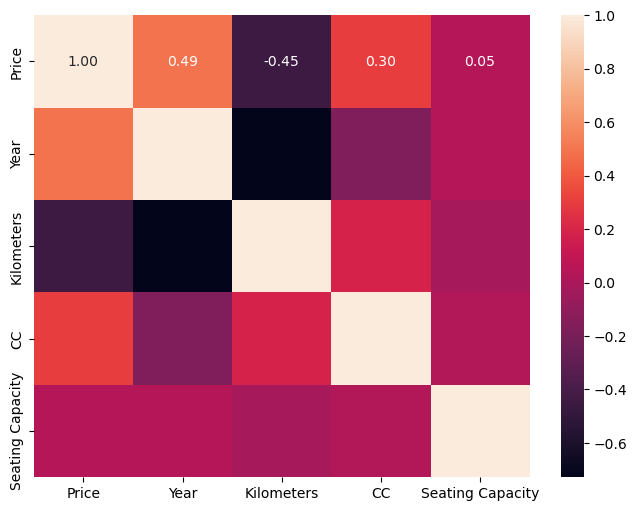

In [248]:
numerical = data.select_dtypes(include=['number'])
plt.figure(figsize=(8, 6))
sns.heatmap(data = numerical.corr(), annot = True, fmt = '.2f')
plt.show()